
# Laboratorio: Red Neuronal con MNIST  
**Curso:** Machine Learning  
**Total puntos:** 10

**Objetivo:** Implementar una red neuronal simple para clasificar dígitos escritos a mano del conjunto de datos MNIST utilizando Python y Keras.



## Paso 1: Cargar el conjunto de datos MNIST (1 punto)

Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.


In [2]:

from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step
Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)



## Paso 2: Visualizar ejemplos del dataset (1 punto)

✏️ **Slot para completar:** Visualiza al menos 5 imágenes con sus etiquetas utilizando `matplotlib.pyplot.imshow()`.


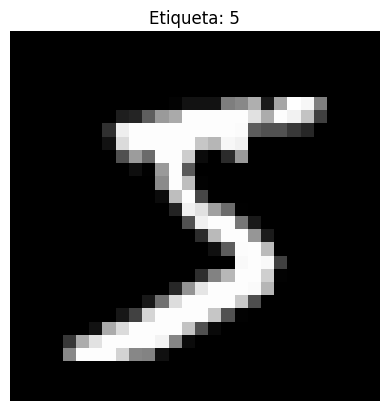

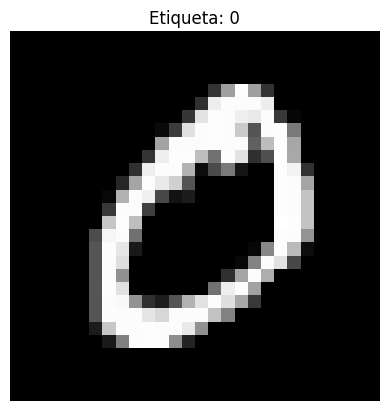

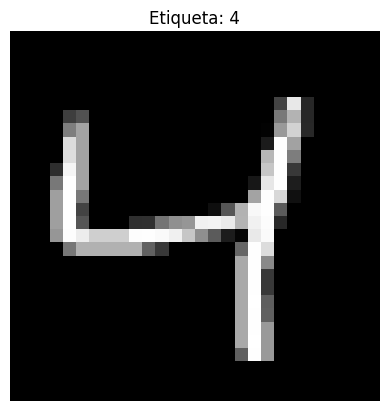

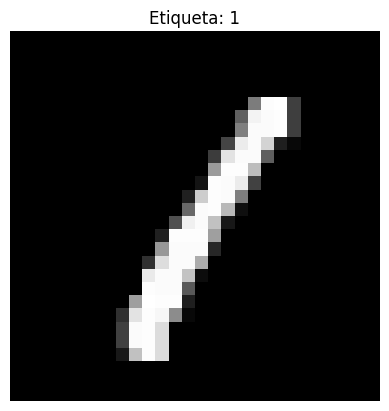

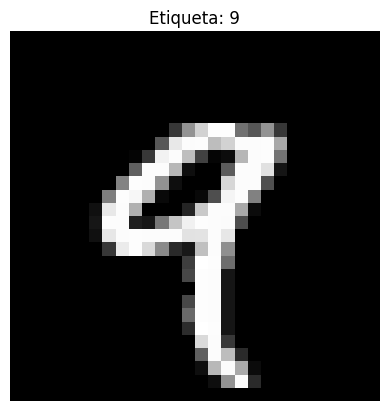

In [3]:

# COMPLETA AQUÍ: Visualización de imágenes con sus etiquetas
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Etiqueta: {y_train[i]}')
    plt.axis('off')
    plt.show()




## Paso 3: Preprocesamiento (1 punto)

✏️ **Slot para completar:** 
- Normaliza las imágenes (divide por 255.0).
- Aplana cada imagen a un vector de 784 valores.
- Codifica las etiquetas con `to_categorical`.


In [4]:
from tensorflow.keras.utils import to_categorical

# COMPLETA AQUÍ: Normalización, flattening y codificación one-hot
import numpy as np
# Normalizar los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Aplanar las imágenes
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)
# Codificación one-hot
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("Tamaño del set de entrenamiento después de la normalización y aplanado:", x_train.shape)
print("Tamaño del set de test después de la normalización y aplanado:", x_test.shape)



Tamaño del set de entrenamiento después de la normalización y aplanado: (60000, 784)
Tamaño del set de test después de la normalización y aplanado: (10000, 784)



## Paso 4: Definir la red neuronal (2 puntos)

✏️ **Slot para completar:** 
- Crea un modelo `Sequential`.
- Agrega una capa oculta con activación ReLU.
- Agrega una capa de salida con activación Softmax.
- Compila el modelo con `adam` y `categorical_crossentropy`.


In [5]:

# COMPLETA AQUÍ: Definición y compilación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Definir el modelo
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



c:\Users\valen\OneDrive\Documentos\repo\ML-S08-decisionTrees-Vyanez\mi_entorno\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



## Paso 5: Entrenar el modelo (1 punto)

✏️ **Slot para completar:** Entrena el modelo con `fit` durante 5 épocas y batch size 32.


In [6]:

# COMPLETA AQUÍ: Entrenamiento del modelo
# Entrenar el modelo con fit durante 5 épocas y batch_size=32
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8799 - loss: 0.3844 - val_accuracy: 0.9693 - val_loss: 0.1028
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9664 - loss: 0.1096 - val_accuracy: 0.9714 - val_loss: 0.0922
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9734 - loss: 0.0848 - val_accuracy: 0.9723 - val_loss: 0.0985
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9795 - loss: 0.0645 - val_accuracy: 0.9775 - val_loss: 0.0753
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9831 - loss: 0.0536 - val_accuracy: 0.9763 - val_loss: 0.0879



## Paso 6: Evaluar el modelo (1 punto)

✏️ **Slot para completar:** Evalúa el modelo con `evaluate()` en el conjunto de prueba.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9718 - loss: 0.0974
Pérdida en el conjunto de test: 0.08207859843969345
Precisión en el conjunto de test: 0.9763000011444092


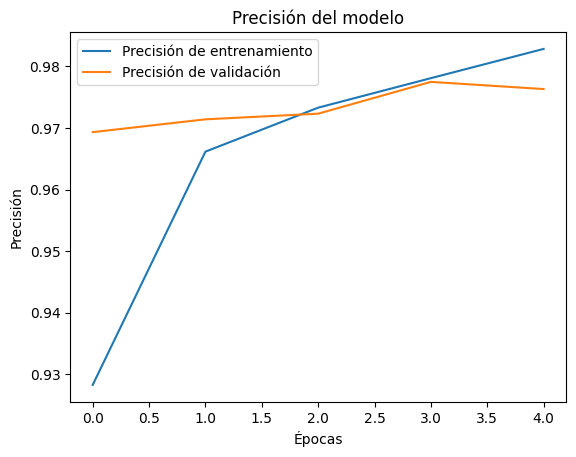

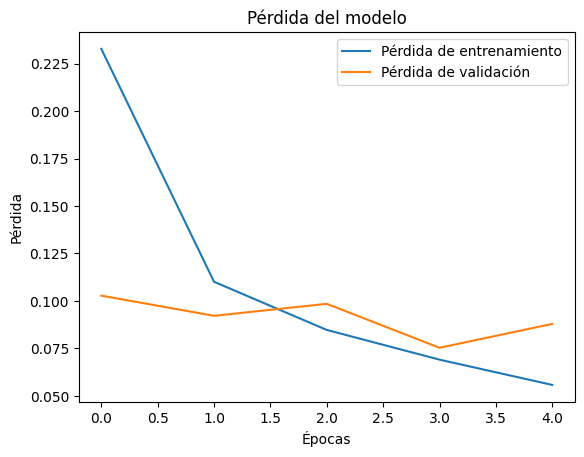

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Primeras 5 predicciones: [7 2 1 0 4]


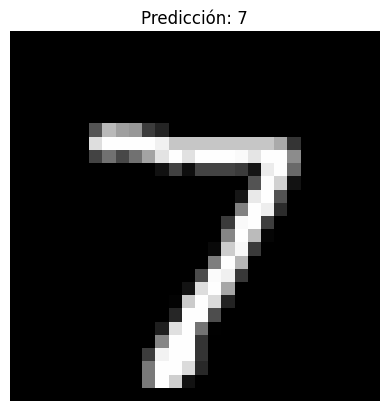

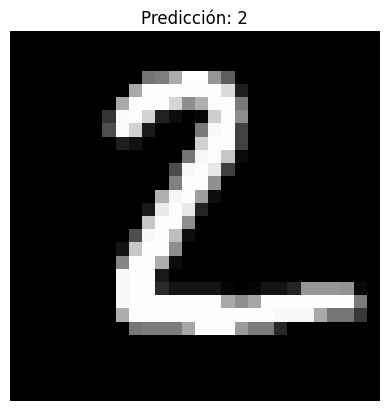

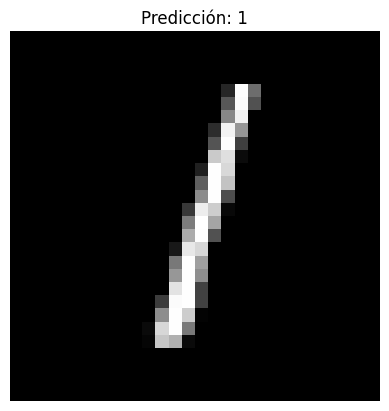

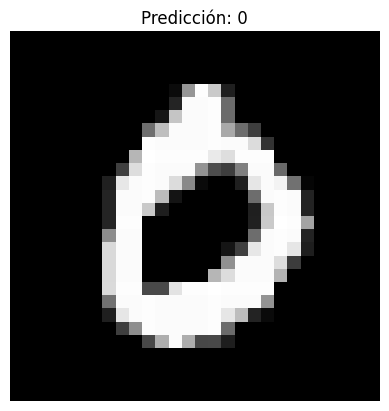

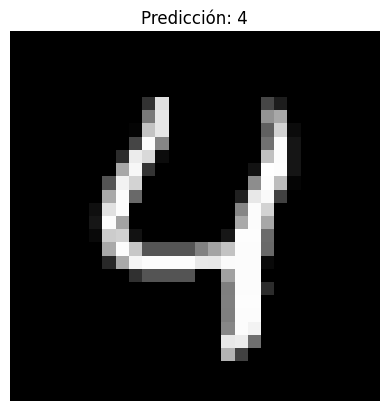

In [ ]:

# COMPLETA AQUÍ: Evaluación del modelo
# Evaluar el modelo en el conjunto de test con evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Pérdida en el conjunto de test:", test_loss)
print("Precisión en el conjunto de test:", test_accuracy)
# Visualizar la precisión y la pérdida durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Épocas')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.legend()
plt.show()

#Predicción de etiquetas
# Predecir etiquetas para el conjunto de test
predictions = model.predict(x_test)
# Obtener la etiqueta con mayor probabilidad
predicted_labels = np.argmax(predictions, axis=1)
# Visualizar las primeras 5 predicciones
print("Primeras 5 predicciones:", predicted_labels[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicción: {predicted_labels[i]}')
    plt.axis('off')
    plt.show()
    


## Preguntas de Reflexión (3 puntos en total)

### 1. ¿Qué ventaja observas al usar codificación one-hot para las etiquetas? (0.5 punto)

Mejora interpretación de la salida al convertir cada número en un vector binario, lo que puede dar una probabilidad para cada clase en lugar de un solo valor. y así la salida del modelo se puede interpretar fácilmente como "que tan seguro está" de cada dígito.
También permite múltiples salidas, haciendo que la red "vote" por cada una y así puede elegir la con mejor probabilidad.
Y evita problemas de magnitud, en donde se priorizaría la clase con el número mayor (si usaramos por ejemplo 1,2,3...).

### 2. ¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas? (0.5 punto)

Si aumentamos el número de neuronas mejoraría la capacidad del aprendizaje porque el modelo captaría patrones más complejos y cosas más sutiles pero requeriría mayor tiempo de entrenamiento y más memoria. También puede surgir que el modelo se sobreajuste.

Con menos neuronas el entrenamiento es más rápido y se usan menos recursos ya que el modelo sería mas simple, pero tendría menor precisión.

Con esto se ve que es mejor mantener un equilibrio en cuantas neuronas necesitamos.

### 3. ¿Qué alternativa propondrías al optimizador `adam` y por qué? (0.5 punto)

Se revisó que puede ser una buena alternativa SDG con momentum. Con el se tiene un mayor control en el aprendizaje a diferencia de Adam que ajusta las tasas de aprendizaje automáticamente. Con SDG se puede controlar manual y eso permite experimentar con cómo eso afecta al entrenamiento.
SDG requiere más épocas de entrenamiento a veces, pero para obtener soluciones que pueden ser mejores. Además usa menos memoria y es más predecible.

### 4. ¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo? (0.5 punto)

Inicialmente debería mejorar la predicción y la pérdida bajaría, hasta que se observa un punto de equilibrio, sin embargo luego de hacer más se puede producir sobreajuste.

### 5. ¿Por qué es importante dividir en conjuntos de entrenamiento y prueba? (1 punto)

Para evaluar el rendimiento del modelo luego de entrenarlo, también para ver la generalización del modelo, se pueden modificar los conjuntos de entrenamiento y prueba o randomizarlos para evaluar si el modelo no se sobreajustó.